In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Diabetes.csv")

In [4]:
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Random Forest Model**

In [6]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [7]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
y_pred = rf_model.predict(X_test)

In [9]:
accuracy_score(y_test, y_pred)

0.7467532467532467

**Model Tuning**

In [10]:
rf = RandomForestClassifier()

In [12]:
rf_params = {"n_estimators": [100,200,500],  # number of tree
             "max_features": [3,5,7,8],      # number of features
             "min_samples_split": [2,5,10]}

In [13]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [14]:
rf_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 5, 'n_estimators': 500}

In [21]:
rf_tuned = RandomForestClassifier(max_features=8, min_samples_split=5, n_estimators=500).fit(X_train, y_train)

In [22]:
y_pred = rf_tuned.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.7467532467532467

**Variable Significance Levels**

In [24]:
rf_tuned.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 8,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
rf_tuned.feature_importances_

array([0.04867358, 0.34577499, 0.08477139, 0.05275958, 0.05451422,
       0.16138798, 0.11716741, 0.13495084])

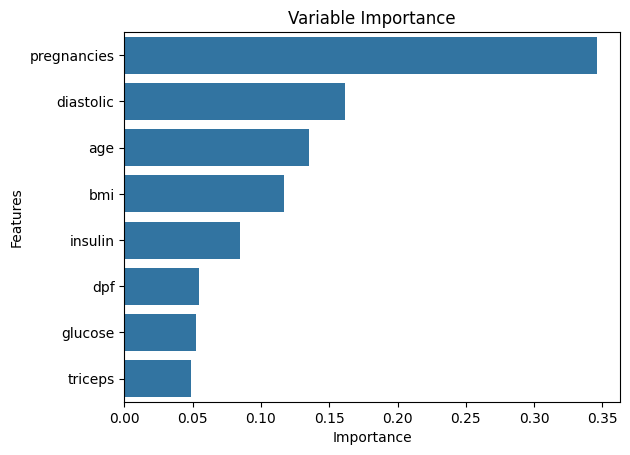

In [28]:
# Önem düzeylerini DataFrame'e çevir ve sıralama yap
feature_importances = pd.DataFrame({"Importance": rf_tuned.feature_importances_},
                                    index=X_train.columns)

# Önem düzeylerini büyükten küçüğe sırala
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Barplot çizimi: x ekseni önem düzeyleri, y ekseni değişken isimleri
sns.barplot(x=feature_importances["Importance"], y=feature_importances.index)

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Variable Importance")
plt.show()